In [4]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.ar_model import AutoReg

In [5]:
company_names = ['DBR', 'AMROBK', 'BACR-Bank', 'BNP', 'BYLAN', 'CMZB', 'CSGAG', 'DB',
                 'DZBK', 'ERGBA', 'HSBC', 'HSBC-HSBCBank', 'INTNED', 'LBW', 'NDB',
                 'SANPAO', 'SANTNDR', 'SEB', 'SOCGEN', 'UBS', 'UCBAG', 'BACF-BankNA',
                 'C', 'CRDSUI-USAInc', 'GS', 'JPM', 'MWD', 'RY', 'MIZUHBA', 'NOMURA']

In [6]:
df_prices = pd.read_csv('Data/cleaned_spreads.csv')
df_prices.head()

,Date,DBR,AMROBK,BACR-Bank,BNP,BYLAN,CMZB,CSGAG,DB,DZBK,...,UCBAG,BACF-BankNA,C,CRDSUI-USAInc,GS,JPM,MWD,RY,MIZUHBA,NOMURA
0,16-12-15,8.0987,59.9553,59.5979,70.2880,78.1634,89.5873,85.6969,94.0470,79.8399,...,77.8846,73.2131,83.3913,82.7087,86.4448,75.6478,86.8967,60.0193,95.3847,72.3096
1,17-12-15,8.1809,60.8999,58.2724,69.8070,78.8935,85.9924,84.5083,92.9731,79.8490,...,77.3960,72.5302,81.0849,81.4686,84.5008,72.6121,84.9827,59.7699,92.2499,74.0992
2,18-12-15,8.1656,61.2130,60.6409,71.5936,78.6469,90.5804,86.2609,94.5435,79.8527,...,77.4035,72.4659,82.7367,81.4956,85.9183,73.5007,86.6896,58.2865,92.2498,75.2375
3,21-12-15,8.1647,60.8928,61.2405,72.2154,78.7569,90.6353,87.5892,96.1573,79.9221,...,78.8901,72.2373,83.3012,82.6190,86.1917,73.8786,86.7687,58.5826,92.5796,75.2423
4,22-12-15,8.1754,61.2091,60.5956,72.2073,79.0299,90.3317,87.7539,96.3618,79.8496,...,79.1427,71.9224,82.9142,82.6994,85.8843,73.1944,85.9890,58.1449,92.5795,78.2812


In [7]:
log_ret = np.log(df_prices[company_names].shift(1)/df_prices[company_names])
log_ret = log_ret.drop(index=[0])
log_ret.head()

dates = df_prices['Date']
print(dates)

0       16-12-15
1       17-12-15
2       18-12-15
3       21-12-15
4       22-12-15
          ...   
1300    09-12-20
1301    10-12-20
1302    11-12-20
1303    14-12-20
1304    15-12-20
Name: Date, Length: 1305, dtype: object


In [8]:
for i,date in enumerate(df_prices['Date']):
    timestamp = datetime.strptime(date, '%d-%m-%y')
    df_prices['Date'][i] = timestamp
    
df_prices.head()

c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,DBR,AMROBK,BACR-Bank,BNP,BYLAN,CMZB,CSGAG,DB,DZBK,...,UCBAG,BACF-BankNA,C,CRDSUI-USAInc,GS,JPM,MWD,RY,MIZUHBA,NOMURA
0,2015-12-16 00:00:00,8.0987,59.9553,59.5979,70.2880,78.1634,89.5873,85.6969,94.0470,79.8399,...,77.8846,73.2131,83.3913,82.7087,86.4448,75.6478,86.8967,60.0193,95.3847,72.3096
1,2015-12-17 00:00:00,8.1809,60.8999,58.2724,69.8070,78.8935,85.9924,84.5083,92.9731,79.8490,...,77.3960,72.5302,81.0849,81.4686,84.5008,72.6121,84.9827,59.7699,92.2499,74.0992
2,2015-12-18 00:00:00,8.1656,61.2130,60.6409,71.5936,78.6469,90.5804,86.2609,94.5435,79.8527,...,77.4035,72.4659,82.7367,81.4956,85.9183,73.5007,86.6896,58.2865,92.2498,75.2375
3,2015-12-21 00:00:00,8.1647,60.8928,61.2405,72.2154,78.7569,90.6353,87.5892,96.1573,79.9221,...,78.8901,72.2373,83.3012,82.6190,86.1917,73.8786,86.7687,58.5826,92.5796,75.2423
4,2015-12-22 00:00:00,8.1754,61.2091,60.5956,72.2073,79.0299,90.3317,87.7539,96.3618,79.8496,...,79.1427,71.9224,82.9142,82.6994,85.8843,73.1944,85.9890,58.1449,92.5795,78.2812


In [9]:
df_SP500 = pd.read_csv('Data/S&P 500 Historical Data.csv')
df_SP500.head()

,Unnamed: 0,Date,Close,Open,High,Low,Vol.,Change %
0,1,"Dec 16, 2015",2073.07,"2,046.50","2,076.72","2,042.43",-,1.45%
1,2,"Dec 17, 2015",2041.89,"2,073.76","2,076.37","2,041.66",-,-1.50%
2,3,"Dec 18, 2015",2005.55,"2,040.81","2,040.81","2,005.33",-,-1.78%
3,4,"Dec 21, 2015",2021.15,"2,010.27","2,022.90","2,005.93",-,0.78%
4,5,"Dec 22, 2015",2038.97,"2,023.15","2,042.74","2,020.49",-,0.88%


In [10]:
for i,date in enumerate(df_SP500['Date']):
    timestamp = datetime.strptime(date, '%b %d, %Y')
    df_SP500['Date'][i] = timestamp
    
df_SP500.head()

c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,Date,Close,Open,High,Low,Vol.,Change %
0,1,2015-12-16 00:00:00,2073.07,"2,046.50","2,076.72","2,042.43",-,1.45%
1,2,2015-12-17 00:00:00,2041.89,"2,073.76","2,076.37","2,041.66",-,-1.50%
2,3,2015-12-18 00:00:00,2005.55,"2,040.81","2,040.81","2,005.33",-,-1.78%
3,4,2015-12-21 00:00:00,2021.15,"2,010.27","2,022.90","2,005.93",-,0.78%
4,5,2015-12-22 00:00:00,2038.97,"2,023.15","2,042.74","2,020.49",-,0.88%


In [11]:
df_prices = df_prices.rename(columns={'Unnamed: 0': 'Date'})
df_prices.head()

,Date,DBR,AMROBK,BACR-Bank,BNP,BYLAN,CMZB,CSGAG,DB,DZBK,...,UCBAG,BACF-BankNA,C,CRDSUI-USAInc,GS,JPM,MWD,RY,MIZUHBA,NOMURA
0,2015-12-16 00:00:00,8.0987,59.9553,59.5979,70.2880,78.1634,89.5873,85.6969,94.0470,79.8399,...,77.8846,73.2131,83.3913,82.7087,86.4448,75.6478,86.8967,60.0193,95.3847,72.3096
1,2015-12-17 00:00:00,8.1809,60.8999,58.2724,69.8070,78.8935,85.9924,84.5083,92.9731,79.8490,...,77.3960,72.5302,81.0849,81.4686,84.5008,72.6121,84.9827,59.7699,92.2499,74.0992
2,2015-12-18 00:00:00,8.1656,61.2130,60.6409,71.5936,78.6469,90.5804,86.2609,94.5435,79.8527,...,77.4035,72.4659,82.7367,81.4956,85.9183,73.5007,86.6896,58.2865,92.2498,75.2375
3,2015-12-21 00:00:00,8.1647,60.8928,61.2405,72.2154,78.7569,90.6353,87.5892,96.1573,79.9221,...,78.8901,72.2373,83.3012,82.6190,86.1917,73.8786,86.7687,58.5826,92.5796,75.2423
4,2015-12-22 00:00:00,8.1754,61.2091,60.5956,72.2073,79.0299,90.3317,87.7539,96.3618,79.8496,...,79.1427,71.9224,82.9142,82.6994,85.8843,73.1944,85.9890,58.1449,92.5795,78.2812


In [12]:
df_SP500.head()

,Unnamed: 0,Date,Close,Open,High,Low,Vol.,Change %
0,1,2015-12-16 00:00:00,2073.07,"2,046.50","2,076.72","2,042.43",-,1.45%
1,2,2015-12-17 00:00:00,2041.89,"2,073.76","2,076.37","2,041.66",-,-1.50%
2,3,2015-12-18 00:00:00,2005.55,"2,040.81","2,040.81","2,005.33",-,-1.78%
3,4,2015-12-21 00:00:00,2021.15,"2,010.27","2,022.90","2,005.93",-,0.78%
4,5,2015-12-22 00:00:00,2038.97,"2,023.15","2,042.74","2,020.49",-,0.88%


In [13]:
df_SP500fin = pd.read_csv('Data/S&P 500 Financials.csv')

In [14]:
# Generate timestamps
for i,date in enumerate(df_SP500fin['Date']):
    timestamp = datetime.strptime(date, '%m/%d/%y')
    df_SP500fin['Date'][i] = timestamp

c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
df_SP500fin.head(20)

,Date,Open,High,Low,Close
0,2021-05-10 00:00:00,627.29,626.55,626.55,626.55
1,2021-05-07 00:00:00,623.92,627.29,627.29,627.29
2,2021-05-06 00:00:00,615.12,623.92,623.92,623.92
3,2021-05-05 00:00:00,609.40,615.12,615.12,615.12
4,2021-05-04 00:00:00,605.19,609.40,609.40,609.40
5,2021-05-03 00:00:00,601.98,605.19,605.19,605.19
6,2021-04-30 00:00:00,607.79,601.98,601.98,601.98
7,2021-04-29 00:00:00,596.94,607.79,607.79,607.79
8,2021-04-28 00:00:00,595.27,596.94,596.94,596.94
9,2021-04-27 00:00:00,589.93,595.27,595.27,595.27


c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


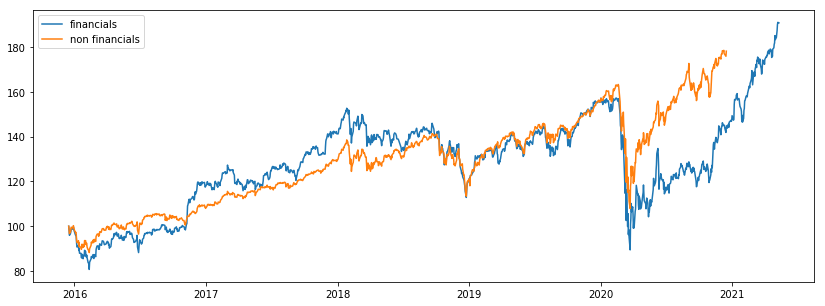

In [16]:
plt.figure(figsize=(14,5))
plt.plot(df_SP500fin['Date'], 100*df_SP500fin[' Close']/df_SP500fin[' Close'].iloc[-1], label='financials')
plt.plot(df_SP500['Date'], 100*df_SP500['Close']/df_SP500['Close'][0], label='non financials')
plt.legend()
plt.show()

In [17]:
df_prices.shape

(1305, 31)

In [18]:
df_SP500.shape

(1259, 8)

In [19]:
df_merged = pd.merge_ordered(df_prices, df_SP500fin, on='Date').fillna(method='backfill')
df_merged.head()

,Date,DBR,AMROBK,BACR-Bank,BNP,BYLAN,CMZB,CSGAG,DB,DZBK,...,GS,JPM,MWD,RY,MIZUHBA,NOMURA,Open,High,Low,Close
0,2015-12-16,8.0987,59.9553,59.5979,70.2880,78.1634,89.5873,85.6969,94.0470,79.8399,...,86.4448,75.6478,86.8967,60.0193,95.3847,72.3096,322.95,328.26,328.26,328.26
1,2015-12-17,8.1809,60.8999,58.2724,69.8070,78.8935,85.9924,84.5083,92.9731,79.8490,...,84.5008,72.6121,84.9827,59.7699,92.2499,74.0992,328.23,323.07,323.07,323.07
2,2015-12-18,8.1656,61.2130,60.6409,71.5936,78.6469,90.5804,86.2609,94.5435,79.8527,...,85.9183,73.5007,86.6896,58.2865,92.2498,75.2375,323.07,314.96,314.96,314.96
3,2015-12-21,8.1647,60.8928,61.2405,72.2154,78.7569,90.6353,87.5892,96.1573,79.9221,...,86.1917,73.8786,86.7687,58.5826,92.5796,75.2423,314.97,317.84,317.84,317.84
4,2015-12-22,8.1754,61.2091,60.5956,72.2073,79.0299,90.3317,87.7539,96.3618,79.8496,...,85.8843,73.1944,85.9890,58.1449,92.5795,78.2812,317.84,320.64,320.64,320.64


In [20]:
df_merged = df_merged.rename(columns={' Close': 'Close'})

c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


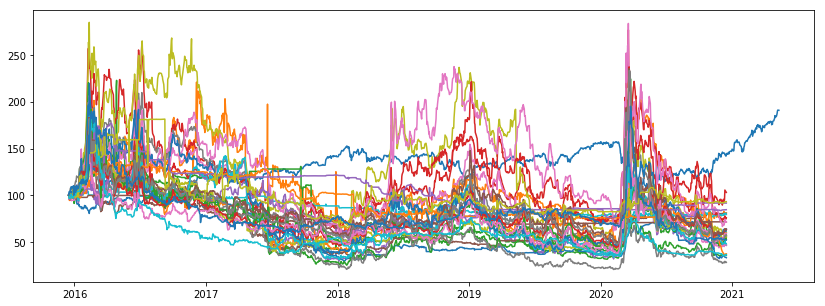

In [21]:
fig = plt.figure(figsize=(14,5))
plt.plot(df_merged['Date'], 100*df_merged['Close']/df_merged['Close'][0])
plt.plot(df_merged['Date'], 100*df_merged[company_names]/df_merged[company_names].iloc[0])
plt.show()

In [22]:
df_merged.to_csv('Data/SP_CDS_combined.csv')

In [23]:
print(df_merged['DBR'])
print((df_merged['DBR'].shift(-1)-df_merged['DBR'])/df_merged['DBR'])

0       8.0987
1       8.1809
2       8.1656
3       8.1647
4       8.1754
         ...  
1399       NaN
1400       NaN
1401       NaN
1402       NaN
1403       NaN
Name: DBR, Length: 1404, dtype: float64
0       0.010150
1      -0.001870
2      -0.000110
3       0.001311
4      -0.010360
          ...   
1399         NaN
1400         NaN
1401         NaN
1402         NaN
1403         NaN
Name: DBR, Length: 1404, dtype: float64


In [24]:
print(df_merged['Close'])
print((df_merged['Close'].shift(-1)-df_merged['Close'])/df_merged['Close'])

0       328.26
1       323.07
2       314.96
3       317.84
4       320.64
         ...  
1399    609.40
1400    615.12
1401    623.92
1402    627.29
1403    626.55
Name: Close, Length: 1404, dtype: float64
0      -0.015811
1      -0.025103
2       0.009144
3       0.008809
4       0.012880
          ...   
1399    0.009386
1400    0.014306
1401    0.005401
1402   -0.001180
1403         NaN
Name: Close, Length: 1404, dtype: float64


In [25]:
logret_SP500 = np.log(df_merged['Close'].shift(-1)/df_merged['Close'])
logret_spreads = np.log(df_merged.loc[:, df_merged.columns.isin(company_names)].shift(-1)/df_merged.loc[:, df_merged.columns.isin(company_names)])

In [26]:
logret_SP500.head(10)
# logret_SP500.shape

0   -0.015937
1   -0.025423
2    0.009102
3    0.008771
4    0.012798
5   -0.000832
6   -0.002005
7    0.000000
8    0.010444
9   -0.007884
Name: Close, dtype: float64

In [27]:
logret_spreads.head(-97)

,DBR,AMROBK,BACR-Bank,BNP,BYLAN,CMZB,CSGAG,DB,DZBK,ERGBA,...,UCBAG,BACF-BankNA,C,CRDSUI-USAInc,GS,JPM,MWD,RY,MIZUHBA,NOMURA
0,0.010099,0.015632,-0.022492,-0.006867,0.009297,-0.040955,-0.013967,-0.011484,0.000114,-0.015443,...,-0.006293,-0.009371,-0.028047,-0.015107,-0.022745,-0.040957,-0.022272,-0.004164,-0.033417,0.024448
1,-0.001872,0.005128,0.039841,0.025271,-0.003131,0.051979,0.020527,0.016750,0.000046,-0.001782,...,0.000097,-0.000887,0.020167,0.000331,0.016636,0.012163,0.019886,-0.025132,-0.000001,0.015245
2,-0.000110,-0.005245,0.009839,0.008648,0.001398,0.000606,0.015281,0.016925,0.000869,0.008223,...,0.019024,-0.003160,0.006800,0.013691,0.003177,0.005128,0.000912,0.005067,0.003569,0.000064
3,0.001310,0.005181,-0.010586,-0.000112,0.003460,-0.003355,0.001879,0.002124,-0.000908,0.003672,...,0.003197,-0.004369,-0.004657,0.000973,-0.003573,-0.009304,-0.009027,-0.007500,-0.000001,0.039594
4,-0.010414,0.002615,-0.011943,-0.006894,0.001645,-0.014753,-0.019063,-0.020093,-0.003229,-0.000206,...,-0.003321,-0.000122,-0.012040,-0.000145,-0.014135,-0.022210,-0.014954,-0.000141,0.044940,0.009902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,-0.009168,-0.016832,-0.017358,-0.037719,0.000781,-0.036437,-0.059517,-0.048443,0.001717,-0.007175,...,0.050364,0.019269,-0.008589,0.001133,-0.015400,0.006012,-0.005001,0.001250,-0.016499,-0.013040
1303,0.008879,-0.008537,-0.006708,-0.006231,-0.000841,-0.013732,0.009772,0.009366,-0.016963,-0.010583,...,-0.003015,0.001993,-0.004518,-0.000903,0.007137,-0.008395,0.000938,0.001038,0.024165,-0.000534
1304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<function matplotlib.pyplot.show(*args, **kw)>

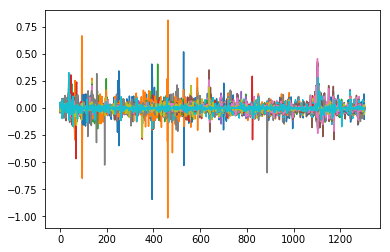

In [28]:
plt.plot(logret_spreads)
plt.show

In [29]:
detrended = {}

for company_name in company_names:  
#     X = np.column_stack((logret_SP500[:-2], logret_spreads[company_name].shift(-1)[:-2]))
    X = logret_SP500[:-100]
#     X = df_merged['Close'][:-1303]
    X = sm.add_constant(X)
    y = logret_spreads[company_name][:-100]


#     y = df_merged[company_name][:-1303]
    
#     print(y)
#     print(X)

    mod = sm.OLS(y, X)
    res = mod.fit()
    print(res.summary())
    
#     detrend = logret_spreads[company_name] - coeff*logret_SP500
#     detrended[company_name] = detrend
    
df_detrended = pd.DataFrame(detrended)
df_detrended.to_csv('cleaned_spreads_detrended.csv')

                            OLS Regression Results                            
Dep. Variable:                    DBR   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     18.54
Date:                Mon, 17 May 2021   Prob (F-statistic):           1.79e-05
Time:                        20:46:16   Log-Likelihood:                 1926.3
No. Observations:                1304   AIC:                            -3849.
Df Residuals:                    1302   BIC:                            -3838.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.179e-05      0.002     -0.027      0.9

                            OLS Regression Results                            
Dep. Variable:                    JPM   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     349.8
Date:                Mon, 17 May 2021   Prob (F-statistic):           2.48e-69
Time:                        20:46:16   Log-Likelihood:                 2563.2
No. Observations:                1304   AIC:                            -5122.
Df Residuals:                    1302   BIC:                            -5112.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.179e-05      0.001     -0.098      0.9

In [30]:
detrended = {}

for i,company_name in enumerate(company_names):  
    names = [cn for j,cn in enumerate(company_names) if j!=i]
    
    avg_returns = logret_spreads[names].mean(axis=1)
    
#     print(avg_returns)
    
#     X = np.column_stack((logret_SP500[:-2], logret_spreads[company_name].shift(-1)[:-2]))
#     X = logret_spreads[names]
    X = avg_returns.iloc[:-2]
    X = sm.add_constant(X)

    mod = sm.OLS(logret_spreads[company_name][:-2], X)
    res = mod.fit()
    print(res.summary())
    
    detrend = logret_spreads[company_name] - coeff*logret_SP500
    detrended[company_name] = detrend
    
# df_detrended = pd.DataFrame(detrended)
# df_detrended.to_csv('cleaned_spreads_detrended.csv', index=False)

MissingDataError: exog contains inf or nans

In [ ]:
# Now let the regression run over different intervals
intervalsize = 200
intervals = np.arange(0,1200,intervalsize)
for interval in intervals:
    y = logret_spreads[company_name][interval:interval+intervalsize]
    X = logret_SP500[interval:interval+intervalsize]
    X = sm.add_constant(X)
    mod = sm.OLS(y, X)
    res = mod.fit()
    print(res.summary())


In [31]:
company_name = 'AMROBK'

y = logret_spreads[company_name][:-1]
X = logret_spreads.mean(axis=1)[:-1]
X = sm.add_constant(X)
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

MissingDataError: exog contains inf or nans

c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]


ValueError: x and y must have same first dimension, but have shapes (1303,) and (1402,)

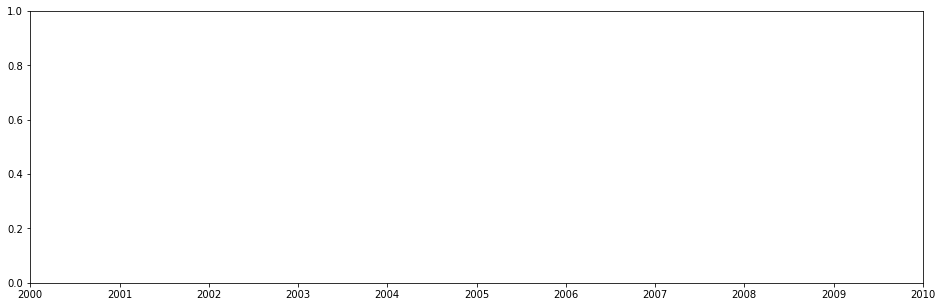

In [32]:
plot_lookback = 2

fig = plt.figure(figsize=(16,5))
# plt.plot(df_prices['Date'][:-lookback], logret_SP500[:-lookback])
# plt.plot(df_prices['Date'][:-lookback], logret_spreads['DBR'][:-lookback]-detrended['DBR'][:-lookback])
plt.plot(df_prices['Date'][:-plot_lookback], logret_spreads['DBR'][:-plot_lookback], alpha=0.4, label='no detrend')
plt.plot(df_prices['Date'][:-plot_lookback], detrended[company_name][:-plot_lookback], alpha=0.4, label='detrend')
plt.legend()
plt.show()

### Try with SP500 financials

In [33]:
detrended = {}

for company_name in [company_names[3]]:  
#     X = np.column_stack((logret_SP500[:-2], logret_spreads[company_name].shift(-1)[:-2]))
    X = logret_SP500[:-100]
#     X = df_merged['Close'][:-100]
#     X = sm.add_constant(X)
    y = logret_spreads[company_name][:-100]


#     y = df_merged[company_name][:-100]
    
#     print(y)
#     print(X)

    mod = ARIMA(endog=y, exog=X, order=(0,1,4))
    res = mod.fit()
    print(res.summary())
    
#     detrend = logret_spreads[company_name] - coeff*logret_SP500
#     detrended[company_name] = detrend
    
# df_detrended = pd.DataFrame(detrended)
# df_detrended.to_csv('cleaned_spreads_detrended.csv')

c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                  D.BNP   No. Observations:                 1303
Model:                 ARIMA(0, 1, 4)   Log Likelihood                2381.461
Method:                       css-mle   S.D. of innovations              0.039
Date:                Mon, 17 May 2021   AIC                          -4748.922
Time:                        20:46:18   BIC                          -4712.715
Sample:                             1   HQIC                         -4735.339
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.014e-06   6.02e-06      0.501      0.616   -8.78e-06    1.48e-05
Close          -0.0132      0.018     -0.730      0.465      -0.049       0.022
ma.L1.D.BNP    -0.8598      0.030    -28.421    

In [34]:
for company_name in [company_names[3]]:  
#     X = np.column_stack((logret_SP500[:-2], logret_spreads[company_name].shift(-1)[:-2]))
    X = logret_SP500[:-100]
#     X = df_merged['Close'][:-100]
#     X = sm.add_constant(X)
    y = logret_spreads[company_name][:-100]


#     y = df_merged[company_name][:-100]
    
#     print(y)
#     print(X)

    mod = AutoReg(endog=y, exog=X, lags=3)
    res = mod.fit()
    print(res.summary())
    
#     detrend = logret_spreads[company_name] - coeff*logret_SP500
#     detrended[company_name] = detrend
    
# df_detrended = pd.DataFrame(detrended)
# df_detrended.to_csv('cleaned_spreads_detrended.csv')

                            AutoReg Model Results                             
Dep. Variable:                    BNP   No. Observations:                 1304
Model:                   AutoReg-X(3)   Log Likelihood                2522.873
Method:               Conditional MLE   S.D. of innovations              0.035
Date:                Mon, 17 May 2021   AIC                             -6.707
Time:                        20:46:18   BIC                             -6.683
Sample:                             3   HQIC                            -6.698
                                 1304                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0002      0.001     -0.175      0.861      -0.002       0.002
BNP.L1         0.1617      0.025      6.518      0.000       0.113       0.210
BNP.L2        -0.0586      0.025     -2.324      0.0

c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


### Betas with rolling window

In [35]:
start_window = 100
end_window = 1304

all_betas = {}

for company_name in company_names:

    df_comp = logret_spreads[company_name].iloc[:-100]
    betas = []

    windows = np.arange(start_window,end_window)
    windows
    for window in windows:
        y = np.log(1+logret_spreads[company_name][window-start_window:window])
        X = np.log(1+logret_SP500[window-start_window:window])
        X = sm.add_constant(X)
        mod = sm.OLS(y, X)
        res = mod.fit()
        if res.pvalues[1] < 0.1:
            betas += [res.params[1]]
        else:
            betas += [0]
            
    all_betas[company_name] = betas

c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\pandas\core\arraylike.py:274: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\pandas\core\arraylike.py:274: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\pandas\core\arraylike.py:274: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\pandas\core\arraylike.py:274: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\pandas\core\arraylike.py:274: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)

c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\pandas\core\arraylike.py:274: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\pandas\core\arraylike.py:274: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\pandas\core\arraylike.py:274: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\pandas\core\arraylike.py:274: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\pandas\core\arraylike.py:274: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)

c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


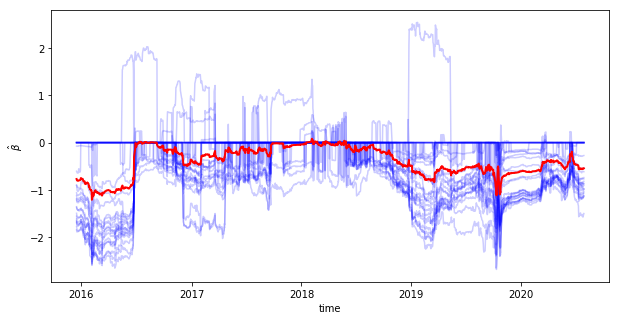

In [36]:
# Plot betas and average beta
fig = plt.figure(figsize=(10,5))

for company_name in company_names:
    plt.plot(df_merged['Date'].iloc[:-200], all_betas[company_name], alpha=0.2, color='blue')

avg_beta = np.mean(np.array(list(all_betas.values())), axis=0)
plt.plot(df_merged['Date'].iloc[:-200], avg_beta, color='red', linewidth=2)

plt.ylabel(r'$\hat{\beta}$')
plt.xlabel('time')
plt.savefig('Figures/betas_over_time.pdf', bbox_inches='tight')
plt.show()

In [37]:
# Use beta estimates to detrend the data

all_detrended = {}

total_len = len(all_betas['BNP'])

for company_name in company_names:
    logret = logret_spreads[company_name].iloc[:total_len]
    SP500f = logret_SP500.iloc[:total_len]
    betas = all_betas[company_name]
    detrended = logret - betas*SP500f
    
    all_detrended[company_name] = detrended

In [38]:
df_detrended_movingbeta = pd.DataFrame(all_detrended)
df_detrended_movingbeta.to_csv('Data/cleaned_spreads_detrended_movingbeta.csv', index=False)

c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


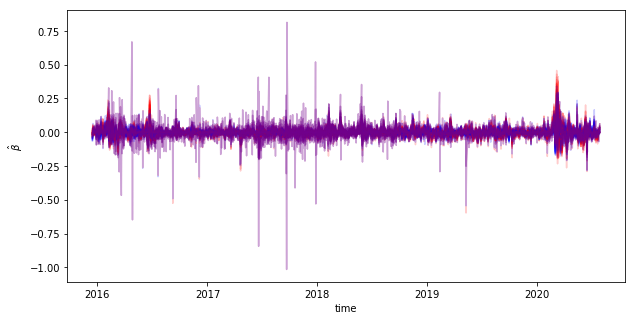

In [39]:
# Plot betas and average beta
fig = plt.figure(figsize=(10,5))

for company_name in company_names:
    plt.plot(df_merged['Date'].iloc[:-200], logret_spreads[company_name].iloc[:-200], alpha=0.2, color='red')
    plt.plot(df_merged['Date'].iloc[:-200], all_detrended[company_name], alpha=0.2, color='blue')

# avg_beta = np.mean(np.array(list(all_betas.values())), axis=0)
# plt.plot(df_merged['Date'].iloc[:-200], avg_beta, color='red', linewidth=2)

plt.ylabel(r'$\hat{\beta}$')
plt.xlabel('time')
# plt.savefig('Figures/betas_over_time.pdf', bbox_inches='tight')
plt.show()